In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12, 7)
plt.rcParams.update({'font.size':12})
#from google.colab import drive
#drive.mount('/content/drive')

# IMPORTATION DES DATASETS

#### Un premier nettoyage est réalisé dès l'import des data datasets suite au constat de valeurs \\\\N correspondants aux champs non renseignés.
#### Remplacement de ces valeurs par nan : na_values = "\\\\N".

In [ ]:
# Table 1 :

# link = "https://datasets.imdbws.com/name.basics.tsv.gz"
# 
data_name_basics = pd.read_table("donnees/name.basics.tsv/data.tsv", 
                               na_values = "\\N",
                                low_memory=False)

In [ ]:
# Table 2 :

#link = "https://datasets.imdbws.com/title.akas.tsv.gz"

data_title_akas = pd.read_table("donnees/title.akas.tsv/data.tsv", 
                              na_values = "\\N",
                             low_memory=False)

In [ ]:
# Table 3 :

#link = "https://datasets.imdbws.com/title.basics.tsv.gz"

data_title_basics = pd.read_table("donnees/title.basics.tsv/data.tsv",
                                  na_values = "\\N",
                                  low_memory=False)

In [ ]:
# Table 4 :

# https://datasets.imdbws.com/title.crew.tsv.gz

data_title_crew = pd.read_table("donnees/title.crew.tsv/data.tsv",
                               na_values = "\\N",
                                low_memory=False)

In [ ]:
# Table 5 :

# https://datasets.imdbws.com/title.episode.tsv.gz

data_title_episode = pd.read_table("donnees/title.episode.tsv/data.tsv",
                                  na_values = "\\N",
                                  low_memory=False)

In [ ]:
# Table 6 :

# https://datasets.imdbws.com/title.principals.tsv.gz

data_title_principals = pd.read_table("donnees/title.principals.tsv/data.tsv", 
                                     na_values = "\\N",
                                     low_memory=False)

In [ ]:
# Table 7 :

# https://datasets.imdbws.com/title.ratings.tsv.gz

data_title_ratings = pd.read_table("donnees/title.ratings.tsv/data.tsv", 
                                   na_values = "\\N",
                                   low_memory=False)

In [ ]:
len(data_title_principals)

48121496

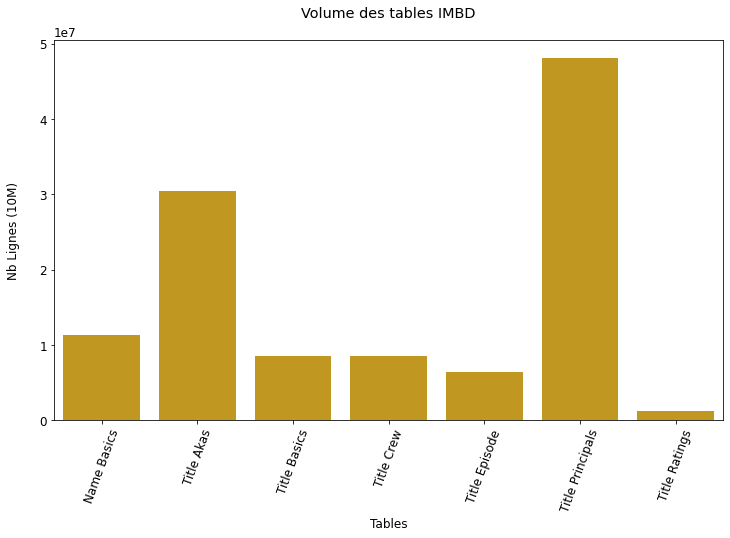

In [ ]:

total_tables = [len(data_name_basics), len(data_title_akas), len(data_title_basics), len(data_title_crew), len(data_title_episode), len(data_title_principals), len(data_title_ratings)]
labels_tables = ["Name Basics", "Title Akas", "Title Basics", "Title Crew", "Title Episode", "Title Principals", "Title Ratings"]
sns.barplot(y=total_tables, x=labels_tables, color='#DBA506')
plt.title("Volume des tables IMBD\n")
plt.ylabel("Nb Lignes (10 M)\n")
plt.xlabel("Tables")
plt.xticks(rotation=70)
plt.show() 

# FONCTIONS UTILES

In [ ]:
def info_df(data):
    """Afficher données générales d'un dataframe"""
    
    print(f"Nombre de lignes : {data.shape[0]}\nNombre de colonnes : {data.shape[1]}\n")
    return data.info(), data.describe()

In [ ]:
def info_decile(data):
    """Afficher les déciles d'une colonne"""
    # Liste des déciles :
    deciles = np.arange(0, 1.1, 0.1)

    # Affichage des valeurs par déciles :
    for x in range(len(deciles)):
        if deciles[x] == 0.0:
            print("min value :", data.quantile(q=deciles[x]))
        elif deciles[x] == 1.0:
            print("max value :", data.quantile(q=deciles[x]))
        else:
            print(f"decile {x} : {data.quantile(q=deciles[x])}")

In [ ]:
def info_na(data):
    """Afficher le total de valeurs nulles
    Afficher le total de valeurs nulles par colonnes"""
    
    total_na = data.isnull().sum().sum()
    colonne_na = data.isnull().sum()
    
    print(f"\nNombre total de valeurs nulles : \n{total_na}")
    print(f"\nNombre de valeurs nulles par colonnes :\n\n{colonne_na}")

In [ ]:
def doublons(df, colonne):
    """Affiche nombre de doublons
    Retourne un df des infos doublons """
    
    count_col = colonne
    doublons = df.value_counts(count_col).to_frame("total").reset_index()
    doublons = doublons[doublons.total > 1]
    print(f"\nNombre de doublons : {doublons.shape[0]}")
    return doublons

# EXPLORATION DES JEUX DE DONNEES
# Objectifs :
*  Dictionnaire des données de chaque set
*  Vérification des types
*  Recherche des valeurs aberrantes
*  Vérification des valeurs manquantes
*  Premiers nettoyages des données
*  Analyse et visualisation de certains Kpis sur le data set global
*  Sélection et filtre du jeu de données pour le modèle de recommandation

# Table 1 : name.basics.tsv.gz - Acteurs

Elle donne les infos suivantes sur les acteurs :
- nconst (string) = identificateur unique alphanumérique du nom/de la personne
- primaryName (string) = nom le plus souvent attribué à la personne
- birthYear = au format AAAA
- deathYear = au format AAAA le cas échéant, sinon '\N'
- primaryProfession (array of strings) = les 3 principales professions de la personne
- knownForTitles (array of tconsts) = titres (titleId) pour lesquels la personne est connue

In [ ]:
data_name_basics.head(2)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0053137,tt0031983"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0117057,tt0075213,tt0038355,tt0037382"


In [ ]:
# informations générales de la table
info_df(data_name_basics)

Nombre de lignes : 11297133
Nombre de colonnes : 6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11297133 entries, 0 to 11297132
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   nconst             object 
 1   primaryName        object 
 2   birthYear          float64
 3   deathYear          float64
 4   primaryProfession  object 
 5   knownForTitles     object 
dtypes: float64(2), object(4)
memory usage: 517.1+ MB


(None,
            birthYear      deathYear
 count  540090.000000  196609.000000
 mean     1951.438240    1990.727088
 std        34.619476      34.292025
 min         4.000000      17.000000
 25%      1930.000000    1977.000000
 50%      1958.000000    1999.000000
 75%      1978.000000    2012.000000
 max      2021.000000    2021.000000)

### Analyse des années de naissance et mort

In [ ]:
# info deciles des années de mort
print(info_decile(data_name_basics.deathYear))

min value : 17.0
decile 1 : 1954.0
decile 2 : 1971.0
decile 3 : 1982.0
decile 4 : 1991.0
decile 5 : 1999.0
decile 6 : 2005.0
decile 7 : 2010.0
decile 8 : 2014.0
decile 9 : 2018.0
max value : 2021.0
None


In [ ]:
# info deciles des années de naissance
info_decile(data_name_basics.birthYear)

min value : 4.0
decile 1 : 1906.0
decile 2 : 1924.0
decile 3 : 1937.0
decile 4 : 1947.0
decile 5 : 1958.0
decile 6 : 1967.0
decile 7 : 1974.0
decile 8 : 1981.0
decile 9 : 1987.0
max value : 2021.0


In [ ]:
# infos valeurs nulles
info_na(data_name_basics)


Nombre total de valeurs nulles : 
26165672

Nombre de valeurs nulles par colonnes :

nconst                      0
primaryName                 0
birthYear            10757043
deathYear            11100524
primaryProfession     2337237
knownForTitles        1970868
dtype: int64


In [ ]:
# Vérification des valeurs aberrantes
data_name_basics[((data_name_basics.birthYear.map(str).apply(len) < 6) & (data_name_basics.birthYear.notnull()))
                 | ((data_name_basics.deathYear.map(str).apply(len) < 6) & (data_name_basics.deathYear.notnull()))
                 | ((data_name_basics.birthYear.map(str).apply(len) > 6) & (data_name_basics.birthYear.notnull()))
                 | ((data_name_basics.deathYear.map(str).apply(len) > 6) & (data_name_basics.deathYear.notnull()))]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
407533,nm0430769,Flavius Josephus,37.0,95.0,"writer,miscellaneous","tt0009573,tt0237666,tt0273236,tt0049833"
487152,nm0515385,Titus Livius,59.0,17.0,writer,tt0003740
579261,nm0613556,Shikibu Murasaki,973.0,1031.0,writer,"tt0094100,tt0256385,tt0092875,tt0043580"
617244,nm0653992,Ovid,NaN,17.0,writer,"tt3179572,tt0057818,tt0085182,tt3907210"
639931,nm0678112,Petronius,NaN,66.0,writer,"tt0064940,tt9064588,tt0166788,tt0058904"
739427,nm0784172,Lucio Anneo Seneca,4.0,65.0,writer,"tt0237666,tt0972562,tt0218822,tt0049203"
3233027,nm1240835,Augustinus,354.0,430.0,writer,tt0318742
3260206,nm12436700,Aristotle,384.0,322.0,NaN,NaN
3719823,nm1291933,Cassius Dio,163.0,235.0,writer,"tt0092322,tt0237666,tt0397049"
3835439,nm1304029,Appian,95.0,165.0,writer,tt0056937


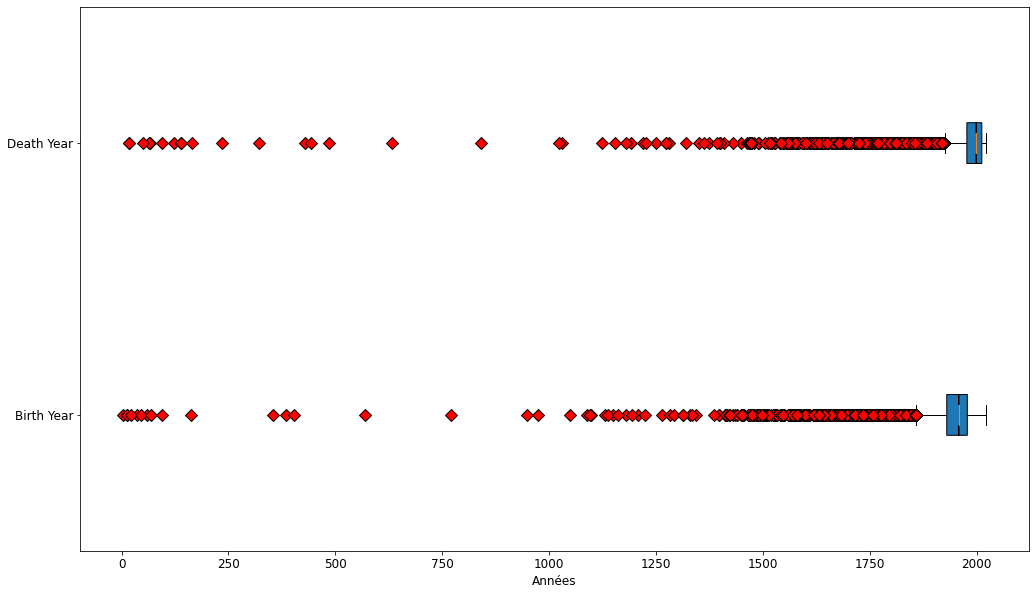

In [ ]:
# visualisation des outliers

# prépration des données, hors nan
data_plot_birth = data_name_basics[data_name_basics.birthYear.notnull()]
data_plot_death = data_name_basics[data_name_basics.deathYear.notnull()]
data_plot = [data_plot_birth.birthYear, data_plot_death.deathYear]

fig, ax = plt.subplots(figsize=(17,10))

# set up des outlier forme losange et couleur rouge
red_outlier = dict(markerfacecolor='r', marker='D', markersize=8)

# Graphique box plot
ax.boxplot(data_plot, vert=0, notch=True, patch_artist=True, flierprops=red_outlier)

# Légende x
ax.set_xlabel('Années')

# Légende y
ax.set_yticklabels(['Birth Year', 'Death Year'])

# Afficher graph
plt.show()

In [ ]:
# Filtre valeurs nulles "birthYear" :

val_nulles_birth = data_name_basics[data_name_basics["birthYear"].isna()]
print("\nNb dates birth valeurs nulles :", val_nulles_birth.shape[0])
val_nulles_birth.head(2)


Nb dates birth valeurs nulles : 10757043


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
82,nm0000083,Alan Miller,NaN,NaN,"editor,writer,director","tt0320978,tt5969604,tt0969216,tt0424773"
93,nm0000094,J. Reifel,NaN,NaN,writer,"tt0118631,tt0116030,tt0118886,tt0117915"


In [ ]:
# Filtre valeurs nulles "deathYear" :

val_nulles_death = data_name_basics[data_name_basics.deathYear.isna()]
print("\nNb dates birth valeurs nulles :", val_nulles_death.shape[0])
val_nulles_death.head(2)


Nb dates birth valeurs nulles : 11100524


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0056404"
46,nm0000047,Sophia Loren,1934.0,NaN,"actress,soundtrack","tt0058335,tt0054749,tt0060121,tt0076085"


In [ ]:
# Filtre valeurs nulles "birthYear" et "deathYear":

val_nulles_birth_death = data_name_basics[data_name_basics["birthYear"].isna() & data_name_basics["deathYear"].isna()]
print("\nNb dates death + birth valeurs nulles", val_nulles_birth_death.shape[0])
print("On constate un grand nombre de dates non renseignées pour lesquelles nous ne pourrons pas calculer l'âge des individus.")
print(f"Ratio de valeurs manquantes sur le total : {round(val_nulles_birth_death.shape[0] / data_name_basics.shape[0] * 100, 2)} %")
print("Conclusion : Les colonnes bithYear et deathYear seront écartées de notre sélection.")
val_nulles_birth_death.head(2)


Nb dates death + birth valeurs nulles 10746033
On constate un grand nombre de dates non renseignées pour lesquelles nous ne pourrons pas calculer l'âge des individus.
Ratio de valeurs manquantes sur le total : 95.12 %
Conclusion : Les colonnes bithYear et deathYear seront écartées de notre sélection.


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
82,nm0000083,Alan Miller,NaN,NaN,"editor,writer,director","tt0320978,tt5969604,tt0969216,tt0424773"
93,nm0000094,J. Reifel,NaN,NaN,writer,"tt0118631,tt0116030,tt0118886,tt0117915"


In [ ]:
# Filtre valeurs non nulles "deathYear" & "birthYear" pour calcul âge des Kpi généraux, mais ils n'auront pas vraiment de signification:

val_calcul_age = data_name_basics[(data_name_basics["deathYear"].notna() & data_name_basics["birthYear"].notna())
                                  |(data_name_basics["deathYear"].isna() & data_name_basics["birthYear"].notna())]
print("\nNb dates birth valeurs nulles :", val_calcul_age.shape[0])
print("Nous pourrons calculer l'âge sur 540090 individus")
val_calcul_age.head(2)


Nb dates birth valeurs nulles : 540090
Nous pourrons calculer l'âge sur 540090 individus


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0053137,tt0031983"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0117057,tt0075213,tt0038355,tt0037382"


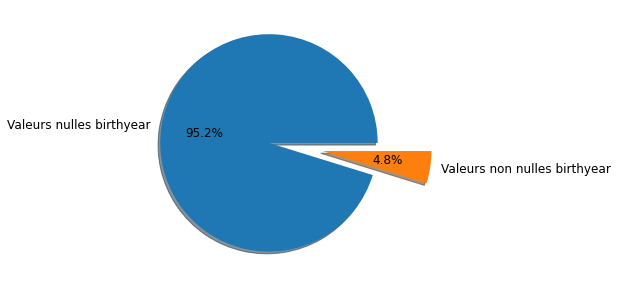

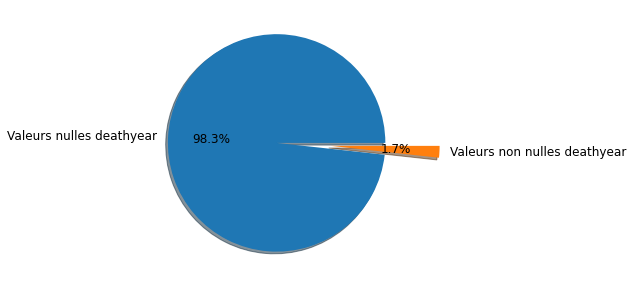

In [ ]:
# Camembert recensant les valeurs nulles et non nulles des années de naissances :
explode = (0, 0.5)

data = pd.DataFrame({' ': [len(data_name_basics[data_name_basics["birthYear"].isna()]), 
                           len(data_name_basics[data_name_basics["birthYear"].notna()])]},
                    index = ['Valeurs nulles birthyear', 'Valeurs non nulles birthyear'])
plot = data.plot.pie(y = ' ', 
                     figsize = (10, 5), 
                     autopct = '%1.1f%%', 
                     shadow = True,
                     explode=explode)
plot.legend().set_visible(False)

data_2 = pd.DataFrame({' ': [len(data_name_basics[data_name_basics["deathYear"].isna()]), 
                             len(data_name_basics[data_name_basics["deathYear"].notna()])]},
                    index = ['Valeurs nulles deathyear', 'Valeurs non nulles deathyear'])
plot_2 = data_2.plot.pie(y = ' ', 
                         figsize = (10, 5), 
                         autopct = '%1.1f%%', 
                         shadow = True,
                         explode=explode)
plot_2.legend().set_visible(False)


plt.show()

In [ ]:
# Check des doublons noms, naissance, décès :

data_name_basics[data_name_basics.duplicated(["primaryName", "birthYear", "deathYear"])].count()

nconst               2339979
primaryName          2339979
birthYear                863
deathYear                219
primaryProfession    1824170
knownForTitles       1928516
dtype: int64

In [ ]:
# Check des détails doublons noms, naissance, décès :

doublons(data_name_basics, ["primaryName","birthYear","deathYear"]).head(2)


Nombre de doublons : 210


,primaryName,birthYear,deathYear,total
0,Roy Benson,1914.0,1977.0,3
1,Dudley Williams,1938.0,2015.0,3


In [ ]:
# Check des doublons noms :

doublons(data_name_basics, ["primaryName"]).head(2)


Nombre de doublons : 840150


,primaryName,total
0,David Smith,339
1,Alex,336


In [ ]:
# Aperçu de Alex :

Alex = data_name_basics[data_name_basics.primaryName == "Alex"]
Alex

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
17570,nm0018187,Alex,NaN,NaN,"actor,costume_department,make_up_department","tt0108001,tt0144366,tt0248216,tt5886454"
17571,nm0018188,Alex,NaN,NaN,actor,"tt0158220,tt4449162,tt0229288,tt0224938"
17572,nm0018189,Alex,NaN,NaN,director,"tt0288186,tt0332674,tt0325996,tt0272303"
933175,nm10012289,Alex,NaN,NaN,actor,tt8767922
934319,nm10013491,Alex,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11228229,nm9913568,Alex,NaN,NaN,assistant_director,NaN
11239790,nm9926957,Alex,NaN,NaN,NaN,NaN
11246127,nm9934270,Alex,NaN,NaN,NaN,NaN
11271187,nm9963530,Alex,NaN,NaN,actor,NaN


In [ ]:
# Aperçu de Paul Smith :

Paul_Smith = data_name_basics[data_name_basics["primaryName"] == "Paul Smith"]
Paul_Smith

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
760913,nm0807188,Paul Smith,1929.0,2006.0,"actor,soundtrack","tt0050659,tt0064892,tt0061281,tt0054542"
763086,nm0809527,Paul Smith,1920.0,1997.0,writer,tt0212698
763087,nm0809528,Paul Smith,NaN,NaN,"sound_department,editorial_department","tt0093209,tt0096895,tt0081573,tt0086393"
763088,nm0809529,Paul Smith,NaN,NaN,"camera_department,cinematographer","tt0112691,tt9409762,tt0120630,tt1430626"
763089,nm0809531,Paul Smith,1947.0,NaN,"director,producer,actor","tt0301199,tt0435625,tt1010048,tt1020558"
...,...,...,...,...,...,...
11134328,nm9805259,Paul Smith,NaN,NaN,NaN,"tt0896893,tt0407423"
11180257,nm9858482,Paul Smith,NaN,NaN,actor,NaN
11246630,nm9934814,Paul Smith,NaN,NaN,cinematographer,tt8618810
11288022,nm9983116,Paul Smith,NaN,NaN,NaN,tt0959790


In [ ]:
# Analyse des professions
professions = data_name_basics.copy()
professions["primaryProfession"] = professions["primaryProfession"].str.split(",")
professions = professions.explode("primaryProfession")

In [ ]:
# Compte de chaque profession
compte_prof = professions.value_counts(["primaryProfession"]).to_frame("total").reset_index()

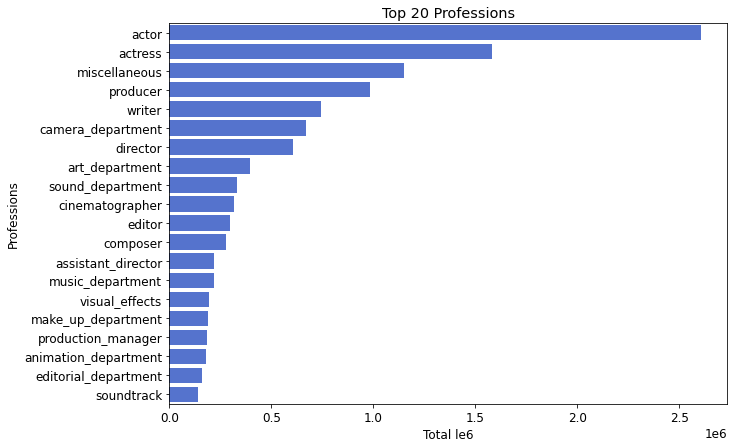

In [ ]:
# top 20 des professions

top_20 = compte_prof.head(20)

plt.subplots(figsize=(10,7))
sns.barplot(y="primaryProfession", 
            x="total", 
            data=top_20,
            color="royalblue").set(
                title='Top 20 Professions', 
                ylabel="Professions", 
                xlabel="Total le6"
                )
plt.show()

### Conclusion Table 1 :  name.basics.tsv.gz - Acteurs
Suite à notre exploration et analyse de la table des acteurs, nous avons fait le choix d'exclure de notre sélection les colonnes **birthYear** et **deathYear**, ayant plus de 95% de valeurs nulles.

Nous ne pourrons malheureusement pas calculer l'âge des individus... :'(

La colonne **primaryProfession** ne nous sera pas utile dans notre sélection.

A ce stade, nous conservons les colonnes :
*  **nconst** : clé de jointure pour d'autres tables
*  **primaryNames**
*  **knownforTitles** : clé de jointure pour d'autres tables

In [ ]:
# selection des colonnes
selection_name_basics = data_name_basics[["nconst", "primaryName", "knownForTitles"]]

# Table 2 : title.akas.tsv.gz - Titres des films

Elle donne les infos suivantes sur les titres de films :
- titleId (string) = identificateur unique alphanumérique du titre
- ordering (integer) = nombre permettant d’identifier de manière unique les lignes pour un titleId donné
- title (string) = le titre local
- region (string) = la région de cette version du titre
- language (string) = la langue du titre
- types (array) = Ensemble d’attributs énumérés pour ce titre alternatif. Un ou plusieurs des éléments suivants: « alternative », « dvd », « festival », « tv », « video », « working », « original », « imdbDisplay ». De nouvelles valeurs peuvent être ajoutées à l’avenir sans avertissement
- attributes (array) = Termes supplémentaires pour décrire ce titre alternatif, non énumérés
- isOriginalTitle (booléen) = 0 : quand ce n'est pas le titre original / 1: c'est le titre original

### Objectif  :

*  Nombre de films par régions afin de connaître le nombre de fois qu'un film a été traduit

In [ ]:
info_df(data_title_akas)

Nombre de lignes : 30387217
Nombre de colonnes : 8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30387217 entries, 0 to 30387216
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   titleId          object 
 1   ordering         int64  
 2   title            object 
 3   region           object 
 4   language         object 
 5   types            object 
 6   attributes       object 
 7   isOriginalTitle  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.8+ GB


(None,
            ordering  isOriginalTitle
 count  3.038722e+07     3.038503e+07
 mean   4.017379e+00     5.991756e-02
 std    3.454935e+00     2.373341e-01
 min    1.000000e+00     0.000000e+00
 25%    2.000000e+00     0.000000e+00
 50%    4.000000e+00     0.000000e+00
 75%    6.000000e+00     0.000000e+00
 max    1.760000e+02     1.000000e+00)

In [ ]:
info_na(data_title_akas)


Nombre total de valeurs nulles : 
63299296

Nombre de valeurs nulles par colonnes :

titleId                   0
ordering                  0
title                     4
region              1892433
language            6011027
types              25240459
attributes         30153186
isOriginalTitle        2187
dtype: int64


In [ ]:
# Titre de colonne "titleId" renommé "tconst" pour faciliter le merge :
data_title_akas = data_title_akas.rename(columns = {"titleId" : "tconst"})
data_title_akas.head(1)

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,NaN,imdbDisplay,NaN,0.0


In [ ]:
print(data_title_akas["region"].unique())

['UA' 'DE' 'HU' 'GR' 'RU' 'US' nan 'JP' 'FR' 'RO' 'GB' 'PT' 'RS' 'ES' 'UY'
 'IT' 'AR' 'FI' 'PL' 'BR' 'DK' 'TR' 'XWW' 'XEU' 'SK' 'CZ' 'SE' 'NZ' 'MX'
 'NO' 'XYU' 'AT' 'VE' 'CSHH' 'SI' 'AU' 'TW' 'LT' 'IN' 'CA' 'NL' 'CO' 'IR'
 'BG' 'BE' 'SUHH' 'HR' 'DZ' 'CH' 'BF' 'XWG' 'VN' 'CN' 'XSA' 'EE' 'IS'
 'DDDE' 'HK' 'XKO' 'CL' 'IE' 'JM' 'PE' 'EG' 'GE' 'BY' 'BA' 'PA' 'PH' 'TJ'
 'XSI' 'TH' 'YUCS' 'ZA' 'MY' 'IL' 'LV' 'PK' 'SG' 'BD' 'ID' 'CU' 'AL' 'BO'
 'AE' 'KR' 'UZ' 'BUMM' 'XPI' 'BJ' 'PR' 'CM' 'AZ' 'DO' 'EC' 'NG' 'MA' 'XAS'
 'GL' 'MN' 'LI' 'LU' 'PY' 'MZ' 'GT' 'BM' 'KZ' 'MD' 'CR' 'LB' 'IQ' 'TM'
 'MK' 'TN' 'HT' 'AM' 'SN' 'GH' 'CI' 'JO' 'KG' 'LK' 'NE' 'GN' 'VDVN' 'TD'
 'SO' 'SD' 'MC' 'CG' 'TT' 'GA' 'BS' 'LY' 'SY' 'AO' 'KH' 'SV' 'MR' 'AF'
 'MG' 'ML' 'GY' 'CY' 'ET' 'GU' 'SR' 'MT' 'TG' 'PG' 'ME' 'QA' 'MU' 'BI'
 'CF' 'NI' 'ZW' 'ZM' 'GW' 'DJ' 'KP' 'RW' 'TZ' 'GI' 'LA' 'SC' 'NP' 'GP'
 'FO' 'PS' 'ZRCD' 'MO' 'AW' 'KW' 'CV' 'SL' 'SM' 'CD' 'TO' 'BT' 'LS' 'HN'
 'KE' 'MQ' 'AD' 'ER' 'SA' 'CSXX' 'IM' 'XKV' 'BH' 'BB' '

In [ ]:
# Nombre de films par région sous df :

check_reg = data_title_akas.value_counts(["region"]).to_frame("total").reset_index()
check_reg.head(20)

,region,total
0,FR,3603807
1,JP,3601490
2,DE,3561089
3,ES,3529370
4,IN,3524341
5,IT,3510834
6,PT,3452072
7,US,1285018
8,GB,400046
9,CA,189505


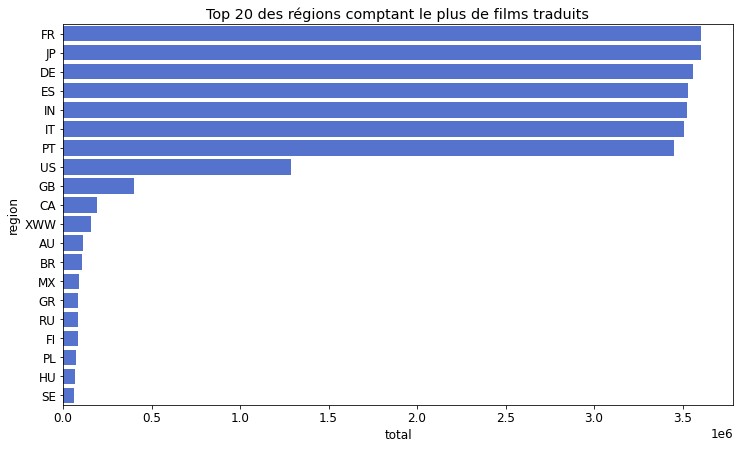

In [ ]:
sns.barplot(y=check_reg["region"].head(20), 
            x=check_reg["total"].head(20), 
            color="royalblue").set_title("Top 20 des régions comptant le plus de films traduits")
plt.show()

In [ ]:
# Nombre de films région US / GB / FR :

select_reg = check_reg[(check_reg["region"] == "US") | (check_reg["region"] == "GB") | (check_reg["region"] == "FR")]
select_reg


,region,total
0,FR,3603807
7,US,1285018
8,GB,400046


In [ ]:
# Pour la sélection : Flag des colonnes regions FR / US / GB qui permettra de filtrer les tconst pour notre sélection:

data_title_akas['fr'] = np.where((data_title_akas["region"] == 'FR'), 1, 0)
data_title_akas['us'] = np.where((data_title_akas["region"] == 'US'), 1, 0)
data_title_akas['gb'] = np.where((data_title_akas["region"] == 'GB'), 1, 0)

In [ ]:
data_title_akas.head() 

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,fr,us,gb
0,tt0000001,1,Карменсіта,UA,NaN,imdbDisplay,NaN,0.0,0,0,0
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0.0,0,0,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0,0,0,0
3,tt0000001,4,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0.0,0,0,0
4,tt0000001,5,Карменсита,RU,NaN,imdbDisplay,NaN,0.0,0,0,0


In [ ]:
# Filtrage data_title_akas si le film existe en version fr == True :

version_fr = data_title_akas[data_title_akas.fr == True]

# Sélection de la colonne "tconst" pour merge et la colonne fr :

version_fr = version_fr[["tconst", "title", "fr"]]
version_fr.rename(columns={"title": "title_fr"}, inplace=True)
version_fr.head(1)

,tconst,title_fr,fr
9,tt0000002,Le clown et ses chiens,1


In [ ]:
# Vérification des doublons :

doublons(version_fr, ["tconst"]).head(2)


Nombre de doublons : 10743


,tconst,total
0,tt16421984,13
1,tt0072029,8


In [ ]:
# Plusieures traductions fr de titres, nous allons conserver le permier titre
version_fr.head()

,tconst,title_fr,fr
9,tt0000002,Le clown et ses chiens,1
23,tt0000003,Pauvre Pierrot,1
26,tt0000004,Un bon bock,1
73,tt0000010,La sortie des usines Lumière,1
78,tt0000010,La sortie des ouvriers de l'usine Lumière,1


In [ ]:
version_fr.drop_duplicates(subset="tconst", keep="first", inplace=True)

In [ ]:
# Filtrage data_tite_akas si film existe en version us == True :

version_us = data_title_akas[data_title_akas.us == 1]

# Sélection de la colonne "tconst" et us pour merge :

version_us = version_us[["tconst", "us"]]
version_us.head(1)

,tconst,us
5,tt0000001,1


In [ ]:
# Filtrage data_tite_akas si film existe en version gb == True :

version_gb = data_title_akas[data_title_akas.gb == 1]

# Sélection de la colonne "tconst" et gb pour merge :

version_gb = version_gb[["tconst", "gb"]]
version_gb.head(1)

,tconst,gb
22,tt0000003,1


In [ ]:
# Suppression des doublons de chaque selection pour merge :

version_fr.drop_duplicates(keep = "first", inplace = True)
version_us.drop_duplicates(keep = "first", inplace = True)
version_gb.drop_duplicates(keep = "first", inplace = True)

In [ ]:
# Check des doublons :

doublons(version_gb, ["tconst"])


Nombre de doublons : 0


,tconst,total


In [ ]:
info_df(data_title_akas)

Nombre de lignes : 30387217
Nombre de colonnes : 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30387217 entries, 0 to 30387216
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tconst           object 
 1   ordering         int64  
 2   title            object 
 3   region           object 
 4   language         object 
 5   types            object 
 6   attributes       object 
 7   isOriginalTitle  float64
 8   fr               int32  
 9   us               int32  
 10  gb               int32  
dtypes: float64(1), int32(3), int64(1), object(6)
memory usage: 2.2+ GB


(None,
            ordering  isOriginalTitle            fr            us            gb
 count  3.038722e+07     3.038503e+07  3.038722e+07  3.038722e+07  3.038722e+07
 mean   4.017379e+00     5.991756e-02  1.185962e-01  4.228811e-02  1.316494e-02
 std    3.454935e+00     2.373341e-01  3.233127e-01  2.012457e-01  1.139808e-01
 min    1.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 25%    2.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 50%    4.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 75%    6.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 max    1.760000e+02     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00)

In [ ]:
# Analyse de la colonne language
check_lang = data_title_akas.value_counts(["language"]).to_frame("total").reset_index()
check_lang.head(20)

,language,total
0,ja,3476107
1,fr,3443567
2,hi,3411462
3,es,3396232
4,de,3395637
5,it,3394680
6,pt,3394516
7,en,309257
8,ru,30746
9,tr,28382


In [ ]:
# Ananlyse de la colonne types
check_types = data_title_akas.value_counts(["types"]).to_frame("total").reset_index()
check_types.head(10)

,types,total
0,imdbDisplay,3106989
1,original,1820598
2,alternative,91397
3,working,50484
4,dvd,21730
5,video,20044
6,tv,18010
7,festival,17018
8,dvdimdbDisplay,243
9,imdbDisplaytv,75


C:\Users\maell\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\maell\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


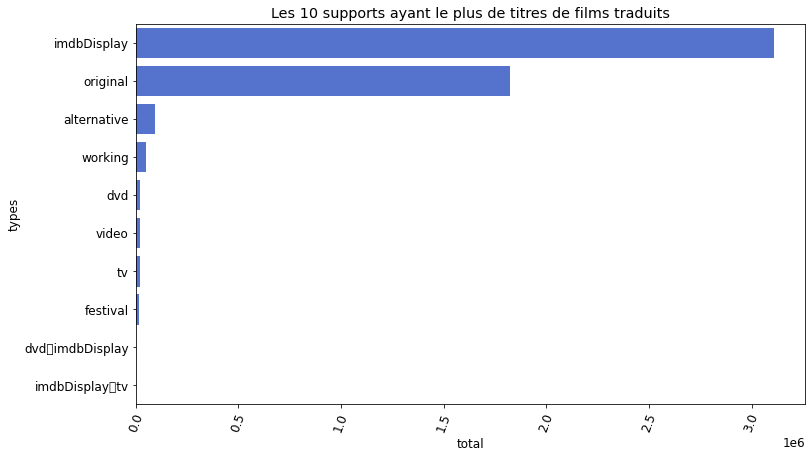

In [ ]:
# Visualisation
sns.barplot(y=check_types["types"].head(10), 
            x=check_types["total"].head(10), 
            color="royalblue").set_title("Les 10 supports ayant le plus de titres de films traduits")
plt.xticks(rotation=70)
plt.show()

### Conclusion Table 2 : title.akas.tsv.gz - Titres des films
Après exploration et analyse de la table title Akas, nous avons décidé d'exclure les colonnes suivantes dont le nombre de valeurs nulles est important :

-  **types**              83 %
-  **attributes**         99 %

D'autre part, les colonnes **language**, **types**, **title** et **isOriginalTitle** ne seront pas utiles à notre modèle car nous ne sélectionnons pas les films sur leur langue originale ni sur le type de support de visionnage.

On ne conservera pas non plus la colonne **ordering**, car elle indique seulement le numéro de ligne d'un tconst.

Nous conservons la colonne **region** afin de cibler les films ayant été traduits en Français et en Anglais. L'objectif est également d'ajouter une colonne nombre de régions, afin de connaître le nombre de traduction par films.

La colonne tconst / **titleId** serviva de clé de jointure avec le df final.

---- > Merge final à faire avec les df version_fr, version_gb, version_us, compte_region

In [ ]:
# Sélection des colonnes finales à joindre au df final :
data_title_akas = data_title_akas[['tconst', 'region', 'fr', 'us', 'gb']]

In [ ]:
# Comptage des régions par film avec "groupby" sera à joindre au df final :

compte_region = data_title_akas.groupby(["tconst"])["region"].size().reset_index().rename(columns = {"region" : "nb_region"})

In [ ]:
compte_region.head(1)

,tconst,nb_region
0,tt0000001,8


# Table 3 : title.basics.tsv.gz - Titres des films et séries

Elle donne les infos suivantes sur les titres :

- tconst (string) = identificateur unique alphanumérique du titre
- titleType (string) = le type/format du titre (par exemple, film, court-métrage, série télévisée, tvépisode, vidéo, etc.)
- primaryTitle (string) = le titre le plus populaire / le titre utilisé par les cinéastes sur le matériel promotionnel au moment de la sortie
- originalTitle (string) = titre original, dans la langue d’origine
- isAdult (booléen) =  0 : films tous publics / 1 : film pour adultes
- startYear (YYYY) = représente l’année de sortie d’un titre/film. Dans le cas des séries télévisées, c’est l’année de début de la série
- endYear (AAAA) = fin d’année de la série télévisée. '\N’ pour tous les autres types de titres
- runtimeMinutes = exécution principale du titre, en minutes
- genres (string array) = inclut jusqu’à trois genres associés au titre.

### Objectifs  :
*  Durée des films, détection des outliers
*  Durée et date de sortie des films
*  Durée de films par catégorie/années
*  Nombre de films par type
*  Nombre de film par genre

In [ ]:
data_title_basics.head(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"


In [ ]:
info_df(data_title_basics)

Nombre de lignes : 8555437
Nombre de colonnes : 9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555437 entries, 0 to 8555436
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 587.5+ MB


(None,
             isAdult     startYear      endYear
 count  8.555436e+06  7.474472e+06  85622.00000
 mean   3.293064e-02  2.003890e+03   2004.30978
 std    2.071522e+00  2.042341e+01     16.71908
 min    0.000000e+00  1.874000e+03   1925.00000
 25%    0.000000e+00  2.000000e+03   1996.00000
 50%    0.000000e+00  2.011000e+03   2011.00000
 75%    0.000000e+00  2.017000e+03   2017.00000
 max    2.020000e+03  2.028000e+03   2030.00000)

In [ ]:
info_na(data_title_basics)


Nombre total de valeurs nulles : 
16174719

Nombre de valeurs nulles par colonnes :

tconst                  0
titleType               0
primaryTitle            9
originalTitle           9
isAdult                 1
startYear         1080965
endYear           8469815
runtimeMinutes    6227357
genres             396563
dtype: int64


In [ ]:
#Colonne "tconst"
print(data_title_basics["tconst"].min())
print(data_title_basics["tconst"].max())

tt0000001
tt9916880


In [ ]:
data_title_basics["tconst"].duplicated().sum() # Comme vu dans le describe, il n'y a pas de doublons.

0

La colonne "tconst" ne nécessite pas de nettoyage à ce stade. On inclura la totalité de cette colonne dans notre sélection. Elle nous servira de clé de jointure.

In [ ]:
#Colonne "titleType"
# Visualisation des 11 types existants
types = data_title_basics['titleType'].unique()
types

array(['short', 'movie', 'tvEpisode', 'tvSeries', 'tvShort', 'tvMovie',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [ ]:
# Pourcentage de films par types :

pourcentage_film_par_type = round((data_title_basics["titleType"].value_counts(normalize = True)* 100), 2)

data_pourcentage_film_par_type = pd.DataFrame(pourcentage_film_par_type).reset_index() # Création d'un df avec le calcul du pourcentage par film
data_pourcentage_film_par_type

,index,titleType
0,tvEpisode,74.62
1,short,9.91
2,movie,6.98
3,video,2.99
4,tvSeries,2.55
5,tvMovie,1.57
6,tvMiniSeries,0.48
7,tvSpecial,0.41
8,videoGame,0.35
9,tvShort,0.12


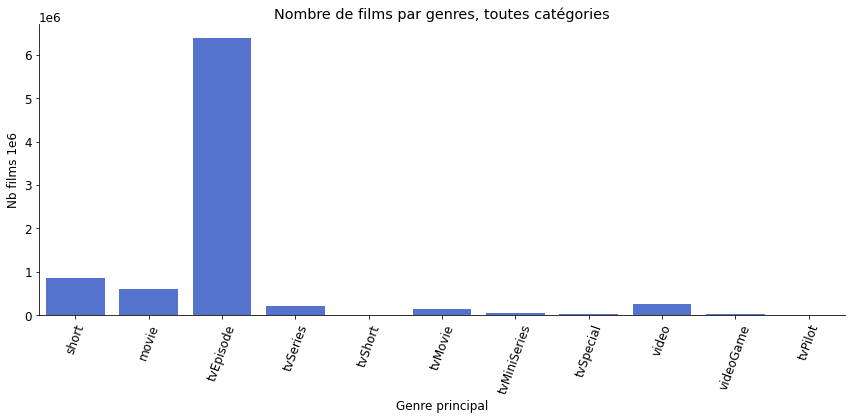

In [ ]:
#graphique
sns.catplot(data=data_title_basics,
            x="titleType",  
            kind="count",
            height=6,
            aspect=2,
            legend=False,
            ci=None,
            color="royalblue"
           ).set(title='Nombre de films par genres, toutes catégories',
                 ylabel="Nb films 1e6",
                 xlabel="Genre principal"
                )
plt.xticks(rotation=70)
plt.tight_layout()


On ne gardera que le type "Movie" car c'est le plus cohérent pour le cinéma.

On ne conservera pas la colonne primaryTitle dans notre sélection, car on utilisera le titre français et original.

In [ ]:
#Colonne #originalTitle (string) :
#Pourcentage de doublons :

pourcentage_doublon_originalTitle = round(((data_title_basics["originalTitle"].duplicated().sum()) / len(data_title_basics) * 100), 2)
print(f"Le pourcentage de doublons est de :", pourcentage_doublon_originalTitle,"%.")


Le pourcentage de doublons est de : 53.13 %.


In [ ]:
#Colonne #originalTitle (string) :
#Pourcentage de NaN :

pourcentage_nan_originalTitle = round(((data_title_basics["originalTitle"].isna().sum()) / len(data_title_basics) * 100), 4)
print(f"Le pourcentage de NaN est de :", pourcentage_nan_originalTitle,"%.")

Le pourcentage de NaN est de : 0.0001 %.


In [ ]:
#Visualisation des NaN

df_na = data_title_basics.loc[(data_title_basics["originalTitle"].isna())] #Sélection des NaN

df_na

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
3460647,tt14510930,tvEpisode,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3680645,tt14911452,tvEpisode,NaN,NaN,0.0,NaN,NaN,NaN,"Drama,Thriller"
4112908,tt15700278,tvEpisode,NaN,NaN,0.0,2021.0,NaN,NaN,Talk-Show
4803169,tt1971246,tvEpisode,NaN,NaN,0.0,2011.0,NaN,NaN,Biography
4895590,tt2067043,tvEpisode,NaN,NaN,0.0,1965.0,NaN,NaN,Music
6663485,tt5773048,tvEpisode,NaN,NaN,0.0,2015.0,NaN,NaN,Talk-Show
7889356,tt8473688,tvEpisode,NaN,NaN,0.0,1987.0,NaN,NaN,Drama
7920532,tt8541336,tvEpisode,NaN,NaN,0.0,2018.0,NaN,NaN,"Reality-TV,Romance"
8512584,tt9824302,tvEpisode,NaN,NaN,0.0,2016.0,NaN,NaN,Documentary


In [ ]:
#Colonne "isAdult" :
valeur_na = data_title_basics['isAdult'].isna().sum()
print(f"On a", valeur_na, "valeurs NaN.")
valeur_1 = (data_title_basics['isAdult'] == 1).sum()
print(f"On a", valeur_1, "valeurs 1.")
valeur_0 = (data_title_basics['isAdult'] == 0).sum()
print(f"On a", valeur_0, "valeurs 0.")

On a 1 valeurs NaN.
On a 263622 valeurs 1.
On a 8291805 valeurs 0.


In [ ]:
pourcentage_film_tous = round((((data_title_basics['isAdult'] == 0).sum() / len(data_title_basics)) * 100), 2)
print(f"Le pourcentage de films tous publics est de :", pourcentage_film_tous,"%.")

Le pourcentage de films tous publics est de : 96.92 %.


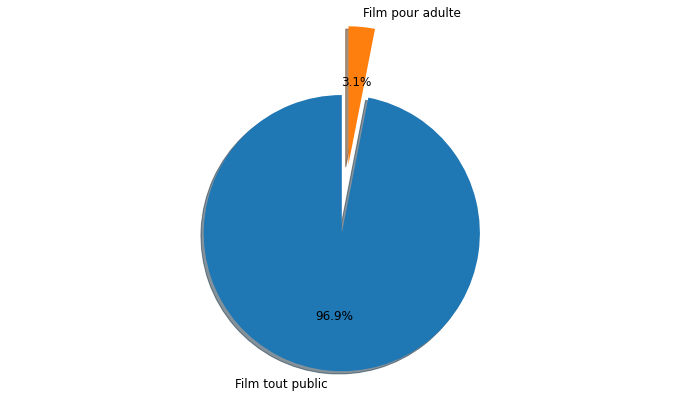

In [ ]:
labels = 'Film tout public', 'Film pour adulte'
sizes = [pourcentage_film_tous, (100 - pourcentage_film_tous)]
explode = (0, 0.5)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

96,9% des films sont tous publics, donc on prendra dans notre sélection uniquement les films tous publics.

In [ ]:
# Colonne "startYear" (YYYY) :
# Visualisation des valeurs uniques :

data_title_basics["startYear"].unique() 

array([1894., 1892., 1893., 1895., 1896., 1898., 1897., 1900., 1899.,
       1901., 1902., 1903., 1905., 1904., 1912., 1907., 1906., 1908.,
       1910., 1909., 1914., 1911., 1913., 1915., 1919., 1916., 1917.,
       1918., 1936., 1925., 1920., 1922., 1921., 1923., 2019., 1924.,
       1928., 1926., 1927., 1929., 2000., 1993., 1935., 2014., 1930.,
       1942., 1934., 1931., 1932., 1939., 1937., 1933., 1950., 1938.,
       1951., 1945., 1946., 1996., 1940., 1944., 1949., 1947., 1941.,
       1952., 1970., 1957., 1943., 1959., 1948., 2001., 1953., 2008.,
       1954., 1965., 1983., 1980., 1973., 1961., 2021., 1995., 1955.,
       1962., 1958., 1956., 1977., 1960., 1964., 1967., 1968., 1963.,
       1986., 1971., 1969., 1972., 1966., 2002., 1976., 1990., 2020.,
       1979., 1974., 1978., 1981., 1988., 1975., 1989., 1985.,   nan,
       2009., 1987., 2010., 2018., 2007., 1984., 1982., 1992., 1991.,
       1994., 1999., 2017., 2005., 2004., 1998., 1997., 2013., 2016.,
       2006., 2003.,

In [ ]:
# Calcul du pourcentage de NaN :

year_na = round((data_title_basics["startYear"].isna().sum() / len(data_title_basics)), 2)
print(f"On a", year_na, "% de valeurs NaN. On peut donc les exclure de notre sélection.")

On a 0.13 % de valeurs NaN. On peut donc les exclure de notre sélection.


In [ ]:
# Nombre de films par années :

data_title_basics_pourc = data_title_basics[["tconst", "startYear"]]

data_title_basics_pourc.dropna(inplace = True) # Suppression des NaN

data_title_basics_pourc.sort_values("startYear", inplace = True)  # Affichage des dates par ordre croissant

film_par_annee = data_title_basics_pourc.groupby("startYear").count()["tconst"]

data_film_par_annee = pd.DataFrame(film_par_annee).reset_index()

data_film_par_annee

<ipython-input-74-064b3a639f80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_title_basics_pourc.dropna(inplace = True) # Suppression des NaN
<ipython-input-74-064b3a639f80>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_title_basics_pourc.sort_values("startYear", inplace = True)  # Affichage des dates par ordre croissant


,startYear,tconst
0,1874.0,1
1,1877.0,1
2,1878.0,2
3,1881.0,2
4,1882.0,2
...,...,...
144,2024.0,162
145,2025.0,36
146,2026.0,16
147,2027.0,13


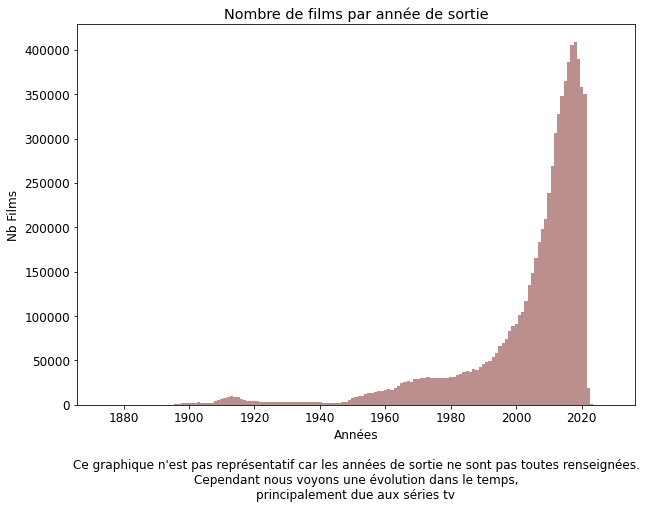

In [ ]:
# Graphique
plt.subplots(figsize=(10,7))
plt.bar(data_film_par_annee["startYear"], 
        data_film_par_annee["tconst"], 
        color='rosybrown',
        width=1)
plt.title('Nombre de films par année de sortie')
plt.xlabel('Années\n\nCe graphique n\'est pas représentatif car les années de sortie ne sont pas toutes renseignées.\nCependant nous voyons une évolution dans le temps,\nprincipalement due aux séries tv')
plt.ylabel('Nb Films')

plt.show()

In [ ]:
# Affichage du Min :

minf = data_film_par_annee["tconst"].min()
idxminf = data_film_par_annee["tconst"].idxmin()
print(f"Le nombre de films minimum est de", minf, "et correspond à l'année", idxminf)

Le nombre de films minimum est de 1 et correspond à l'année 0


In [ ]:
# Affichage de Max :

maxf = data_film_par_annee["tconst"].max()
idxmax = data_film_par_annee["tconst"].idxmax()
print(f"Le nombre de films maximum est de", maxf, "et correspond à l'année", idxmax)

Le nombre de films maximum est de 408592 et correspond à l'année 138


In [ ]:
# Affichage des Déciles :

info_decile(data_title_basics["startYear"])

min value : 1874.0
decile 1 : 1976.0
decile 2 : 1995.0
decile 3 : 2003.0
decile 4 : 2008.0
decile 5 : 2011.0
decile 6 : 2014.0
decile 7 : 2016.0
decile 8 : 2018.0
decile 9 : 2019.0
max value : 2028.0


Au vu du graphique et des infos précédentes, on sélectionne les années qui ont un nombre de sorties de films pertinents : 1950 à 2022

In [ ]:
#Colonne "endYear" 
# Visualisation des valeurs de cette colonne
data_title_basics["endYear"].unique()

array([  nan, 1934., 1947., 1945., 1955., 1949., 1958., 1951., 1950.,
       1952., 1954., 1957., 1953., 1956., 1967., 1971., 1959., 1963.,
       1960., 1961., 1965., 1980., 2016., 1986., 1962., 1972., 1966.,
       1970., 2009., 1973., 1987., 1997., 1974., 1992., 1976., 1975.,
       1982., 2010., 1984., 1964., 1968., 1989., 1969., 1994., 2004.,
       1981., 1999., 1988., 1985., 2003., 1977., 1978., 1993., 2001.,
       2013., 1996., 2011., 2005., 1995., 1979., 2006., 1983., 1990.,
       1998., 2008., 1991., 2020., 2007., 2021., 2018., 2015., 2014.,
       2000., 2019., 2002., 2012., 2022., 2017., 1948., 1938., 1925.,
       1942., 1933., 2026., 1944., 1946., 2024., 2023., 1937., 2030.,
       2028., 2025., 1941., 1939., 1932., 1936., 1935., 2027.])

In [ ]:
#Pourcentage de NaN
pourcentage_na_endYear = round(((data_title_basics["endYear"].isna().sum() / len(data_title_basics))* 100), 2)
print(f"On trouve", pourcentage_na_endYear, "% de NaN.")

On trouve 99.0 % de NaN.


On trouve 99.0 % de NaN, donc on ne va pas garder cette colonne dans notre sélection.

In [ ]:
# Visualisation des runtimeMinutes = 0 => à remplacer par des NaN

cond_run_0 = data_title_basics["runtimeMinutes"] == 0

data_run_0 = data_title_basics.loc[(cond_run_0)]

data_run_0

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


In [ ]:
# Remplacement des Nan par des 0 :
data_title_basics["runtimeMinutes"] = data_title_basics["runtimeMinutes"].replace(0, np.nan, regex = True)

In [ ]:
# Colonne "runtimeMinutes"
# Calcul du pourcentage de NaN :
runtimeMinutes_na = round((data_title_basics["runtimeMinutes"].isna().sum() / len(data_title_basics))*100, 2)
print(f"On a", runtimeMinutes_na, "% de valeurs NaN.")

On a 72.79 % de valeurs NaN.


In [ ]:
# Nombre de NaN par année :

data_run_na = data_title_basics.loc[(data_title_basics["runtimeMinutes"].isna())] #df regroupant les lignes pour lesquelles runtimeMinutes est NaN

data_run_na["runtimeMinutes"].fillna(0, inplace = True) # Remplacement des NaN par des 0 pour faire le groupby :

data_run_na_year = data_run_na.groupby("startYear").count()["runtimeMinutes"]

data_run_na_year_count = data_run_na_year.to_frame().sort_values("runtimeMinutes", ascending = False).reset_index()

data_run_na_year_count.head(20)

C:\Users\maell\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,startYear,runtimeMinutes
0,2018.0,286217
1,2019.0,282711
2,2017.0,281818
3,2021.0,270135
4,2016.0,267553
5,2020.0,261869
6,2015.0,252608
7,2014.0,240377
8,2013.0,226585
9,2012.0,212435


In [ ]:
# Affichage du Max :
maxn = data_run_na_year_count["runtimeMinutes"].max()
idxmaxn = data_run_na_year_count["runtimeMinutes"].idxmax()
print(f"Le nombre de NaN maximum est de", maxn, "et correspond à l'année", idxmaxn)

# Cela semble logique puisque c'est l'année qui compte le plus de films.

Le nombre de NaN maximum est de 286217 et correspond à l'année 0


In [ ]:
# Vérification des données non numériques de runtimes
# des information genres ont été renseignées dans la colonne runtimeMinutes, 
# essentiellement des tv épisodes, ne seront pas présents dans notre sélection

non_num = data_title_basics[(data_title_basics["runtimeMinutes"].notna()) & (data_title_basics["runtimeMinutes"].str.isalpha())]
non_num

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1901104,tt11670006,tvEpisode,...ein angenehmer Unbequemer...\t...ein angene...,0,1981.0,NaN,NaN,Documentary,NaN


In [ ]:
# Colonne genres
# Calcul du pourcentage de NaN :
genres_na = round((data_title_basics["genres"].isna().sum() / len(data_title_basics))*100, 2)
print(f"On a", genres_na, "% de valeurs NaN.")

On a 4.64 % de valeurs NaN.


In [ ]:
# Visualisation des différents genres :
data_title_basics["genres_split"] = data_title_basics["genres"].str.split(",") # On met la colonne au format liste pour ensuite pouvoir appliquer le explode
data_title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_split
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short","[Documentary, Short]"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short","[Animation, Short]"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance","[Animation, Comedy, Romance]"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short","[Animation, Short]"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short","[Comedy, Short]"
...,...,...,...,...,...,...,...,...,...,...
8555432,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0.0,2010.0,NaN,NaN,"Action,Drama,Family","[Action, Drama, Family]"
8555433,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0.0,2010.0,NaN,NaN,"Action,Drama,Family","[Action, Drama, Family]"
8555434,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0.0,2010.0,NaN,NaN,"Action,Drama,Family","[Action, Drama, Family]"
8555435,tt9916856,short,The Wind,The Wind,0.0,2015.0,NaN,27,Short,[Short]


In [ ]:
# Création d'un df data_genres pour étudier les genres :
data_genres = data_title_basics.explode("genres_split")
data_genres

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_split
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short",Documentary
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short",Short
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short",Animation
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short",Short
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance",Animation
...,...,...,...,...,...,...,...,...,...,...
8555434,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0.0,2010.0,NaN,NaN,"Action,Drama,Family",Family
8555435,tt9916856,short,The Wind,The Wind,0.0,2015.0,NaN,27,Short,Short
8555436,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0.0,2014.0,NaN,10,"Adventure,Animation,Comedy",Adventure
8555436,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0.0,2014.0,NaN,10,"Adventure,Animation,Comedy",Animation


In [ ]:
# Visualisation des valeurs/genres uniques 
data_genres["genres_split"].unique() # la valeur "Short" semble correspondre un à type de film, et non à un genre.

array(['Documentary', 'Short', 'Animation', 'Comedy', 'Romance', 'Sport',
       'News', 'Drama', 'Fantasy', 'Horror', 'Biography', 'Music', 'War',
       'Crime', 'Western', 'Family', 'Adventure', 'Action', 'History',
       'Mystery', nan, 'Sci-Fi', 'Musical', 'Thriller', 'Film-Noir',
       'Talk-Show', 'Game-Show', 'Reality-TV', 'Adult'], dtype=object)

In [ ]:
#Nombre de film par genre :
count_genre = data_genres["genres_split"].value_counts().to_frame().reset_index()
count_genre

,index,genres_split
0,Drama,2403787
1,Comedy,1746809
2,Talk-Show,1010480
3,Short,976761
4,Documentary,807204
5,Romance,767765
6,News,752623
7,Family,621143
8,Reality-TV,456525
9,Animation,429643


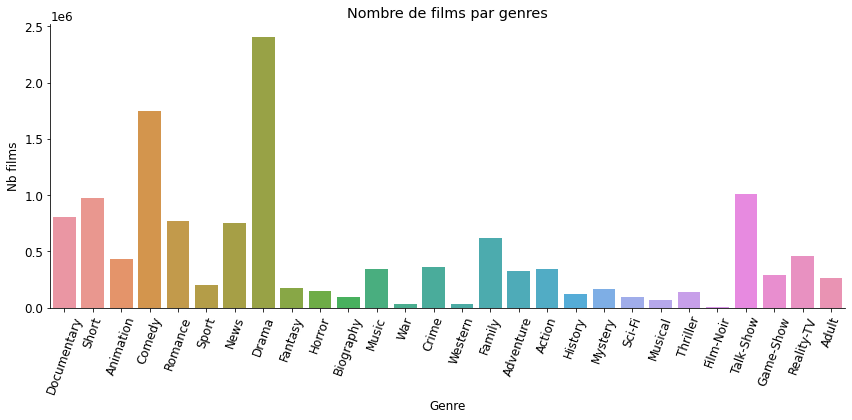

In [ ]:
# Graphique
sns.catplot(data=data_genres,
            x="genres_split",
            kind="count",
            height=6,
            aspect=2,
            legend=False,
            ci=None
           ).set(title='Nombre de films par genres',
                 ylabel="Nb films",
                 xlabel="Genre"
                )
plt.xticks(rotation=70)
plt.tight_layout()
# Afficher graph
plt.show()


In [ ]:
#Nombre de film par genre type movie:
data_genres_movie = data_genres[data_genres["titleType"] == "movie"]
count_genre_movie = data_genres_movie["genres_split"].value_counts().to_frame().reset_index()
count_genre_movie.head()

,index,genres_split
0,Drama,214519
1,Documentary,110439
2,Comedy,101496
3,Action,50049
4,Romance,43952


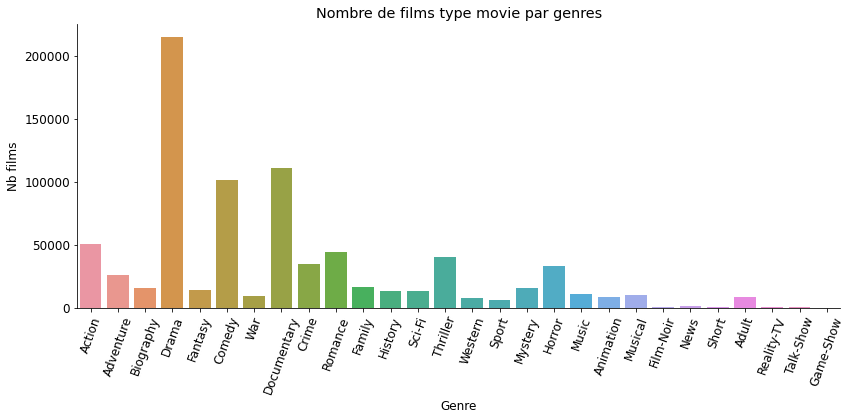

In [ ]:
# Graphique
sns.catplot(data=data_genres_movie,
            x="genres_split",
            kind="count",
            height=6,
            aspect=2,
            legend=False,
            ci=None
           ).set(title='Nombre de films type movie par genres',
                 ylabel="Nb films",
                 xlabel="Genre"
                )
plt.xticks(rotation=70)
plt.tight_layout()
# Afficher graph
plt.show()

### Conclusion Table 3 : title.basics.tsv.gz - Titres des films et séries
Après exploration et analyse de la table title_basics, nous avons décidé d'exclure les colonnes suivantes dont le nombre de valeurs nulles est important :

-  **isAdult**         96,9 %
-  **endYear**         99 %

D'autre part, nous exclurons de notre sélection la colonne **primaryTitle**, car nous utiliserons les titres français et originaux.

Nous opterons pour les films ayant une durée (**runtimeMinutes**) comprise entre 69 et 240 minutes. Les NaN seront exclus.

Pour les colonnes suivantes, nous sélectionnerons :
-  **genres**    : Drama, Comedy, Romance 
-  **isAdult**   : filtre excluant les films adultes
-  **titleType** : movie
-  **startYear** : comprise entre 1950 et 2022

Enfin, nous conserverons l'intégralité des colonnes :
-  **originalTitle**
-  **tconst** (qui servira de clé de jointure)

In [ ]:
# selection title basics :

selection_title_basics = data_title_basics[data_title_basics["titleType"] == "movie"]
# passage valeurs runtime en numérique float
selection_title_basics['runtimeMinutes'] = pd.to_numeric(selection_title_basics['runtimeMinutes'])
selection_title_basics = selection_title_basics[   ((selection_title_basics['startYear'] >= 1950)
                              & (selection_title_basics['startYear'] <= 2022))                              
                              & (selection_title_basics['isAdult'] == 0)
                              & ((selection_title_basics['runtimeMinutes'] > 69)
                              & (selection_title_basics['runtimeMinutes'] < 240))
                              & (selection_title_basics['genres'].notna())]
selection_title_basics = selection_title_basics[["tconst", "originalTitle", "genres", "genres_split", "runtimeMinutes", "startYear"]]

<ipython-input-103-c463d99f4c47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_title_basics['runtimeMinutes'] = pd.to_numeric(selection_title_basics['runtimeMinutes'])


In [ ]:
selection_title_basics.head()

,tconst,originalTitle,genres,genres_split,runtimeMinutes,startYear
15487,tt0015724,Dama de noche,"Drama,Mystery,Romance","[Drama, Mystery, Romance]",102.0,1993.0
16657,tt0016906,Frivolinas,"Comedy,Musical","[Comedy, Musical]",80.0,2014.0
21712,tt0022064,Lebbra bianca,Drama,[Drama],100.0,1951.0
25117,tt0025557,El negro que tenía el alma blanca,"Drama,Musical","[Drama, Musical]",87.0,1951.0
30454,tt0030998,You're Only Young Twice,Comedy,[Comedy],81.0,1952.0


# Table 4 : title.crew.tsv.gz - Réalisateur et scénariste pour chaque titre

Elle donne les infos suivantes sur le réalisateur et le scénariste pour tous les titres :

- tconst (string) = identificateur unique alphanumérique du titre
- directors (array of nconsts) = réalisateur(s) du titre donné
- writers (array of nconsts) = auteur(s) du titre donné

In [ ]:
data_title_crew.head(2)

,tconst,directors,writers
0,tt0000001,nm0005690,NaN
1,tt0000002,nm0721526,NaN


In [ ]:
info_df(data_title_crew) 

Nombre de lignes : 8558802
Nombre de colonnes : 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558802 entries, 0 to 8558801
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 195.9+ MB


(None,
             tconst  directors    writers
 count      8558802    4882381    4365402
 unique     8558802     834142    1153985
 top     tt14743824  nm0022750  nm6352729
 freq             1       6281      11652)

In [ ]:
info_na(data_title_crew)


Nombre total de valeurs nulles : 
7869821

Nombre de valeurs nulles par colonnes :

tconst             0
directors    3676421
writers      4193400
dtype: int64


In [ ]:
pourcentage_dir = round((((data_title_crew['directors'].notna()).sum() / len(data_title_crew)) * 100), 2)
print(f"Le pourcentage de réalisateurs est de :", pourcentage_dir,"%.")

Le pourcentage de réalisateurs est de : 57.05 %.


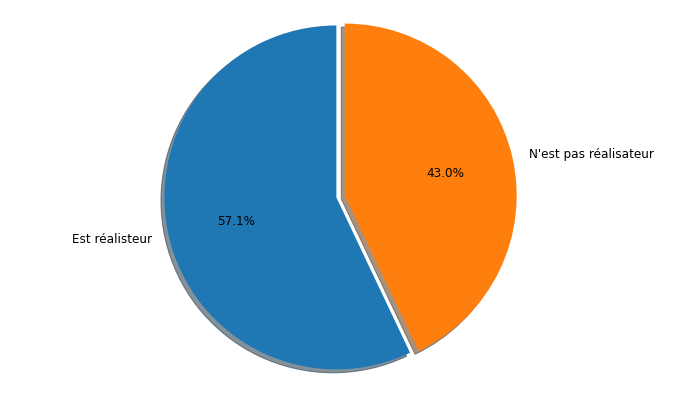

In [ ]:
labels = 'Est réalisteur', "N'est pas réalisateur"
sizes = [pourcentage_dir, (100 - pourcentage_dir)]
explode = (0, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
pourcentage_wri = round((((data_title_crew['writers'].notna()).sum() / len(data_title_crew)) * 100), 2)
print(f"Le pourcentage d'auteurs est de :", pourcentage_wri,"%.")

Le pourcentage d'auteurs est de : 51.0 %.


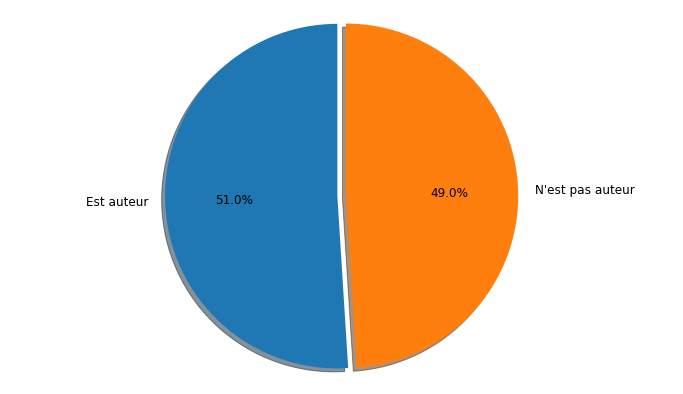

In [ ]:
labels = 'Est auteur', "N'est pas auteur"
sizes = [pourcentage_wri, (100 - pourcentage_wri)]
explode = (0, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
# Check si les colonnes "directors" et "writers" ont des valeurs nulles :

crew_null = data_title_crew[(data_title_crew.directors.isnull()) & (data_title_crew.writers.isnull())]

In [ ]:
print("Nb lignes :", len(crew_null))

Nb lignes : 3059777


In [ ]:
crew_null.head(1)

,tconst,directors,writers
37,tt0000039,NaN,NaN


In [ ]:
pourcentage_doublon_crew= round(((data_title_crew["tconst"].duplicated().sum()) / len(data_title_crew) * 100), 2)
print(f"Le pourcentage de doublons est de :", pourcentage_doublon_crew,"%.")

Le pourcentage de doublons est de : 0.0 %.


In [ ]:
# Sélection des cellules "directors" et "writers" non nulles :

selection_crew = data_title_crew[(data_title_crew.directors.notnull())]

In [ ]:
print("Nb lignes :", len(selection_crew))

Nb lignes : 4882381


In [ ]:
# sélection des films 
selection_crew.head(1)

,tconst,directors,writers
0,tt0000001,nm0005690,NaN


In [ ]:
# Comptage des régions par film avec "groupby" sera à joindre au df final :

compte_dir_crew = selection_crew.groupby(["tconst"])["directors"].size().reset_index().rename(columns = {"directors" : "nb_director"})

In [ ]:
# Filtre sur les réal présents
nb_director_crew = compte_dir_crew[compte_dir_crew["nb_director"]> 0]
nb_director_crew.head(1)

,tconst,nb_director
0,tt0000001,1


### Conclusion Table 4 : title.crew.tsv.gz - Réalisateur et scénariste pour chaque titre

Après exploration et analyse de la table title_crew, nous avons décidé de conserver cette table avec la selection des valeurs non nulles **directors**.

Nous conserverons la colonne **tconst**, et exclurons la colonne **writers**.

Cette table permettra de connaître le réalisateur de chaque film, par une jointure des tconst.

In [ ]:
# Sélection df final table crew
selection_crew = selection_crew[["tconst", "directors"]]

# Table 5 : title.episode.tsv.gz - Titres des épisodes de séries

Elle donne les infos suivantes sur les épisodes tv :
- tconst (string) = identificateur alphanumérique de l’épisode
- parentTconst (string) = identificateur alphanumérique de la série télévisée parente
- seasonNumber (integer) = numéro de saison auquel appartient l’épisode
- episodeNumber (integer) = numéro d’épisode du tconst dans la série télévisée

In [ ]:
info_df(data_title_episode)

Nombre de lignes : 6386757
Nombre de colonnes : 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6386757 entries, 0 to 6386756
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tconst         object 
 1   parentTconst   object 
 2   seasonNumber   float64
 3   episodeNumber  float64
dtypes: float64(2), object(2)
memory usage: 194.9+ MB


(None,
        seasonNumber  episodeNumber
 count  5.019226e+06   5.019226e+06
 mean   3.806406e+00   3.606998e+02
 std    2.519345e+01   1.244227e+03
 min    1.000000e+00   0.000000e+00
 25%    1.000000e+00   7.000000e+00
 50%    1.000000e+00   2.400000e+01
 75%    3.000000e+00   1.310000e+02
 max    2.021000e+03   9.133400e+04)

### Conclusion Table 5 : title.episode.tsv.gz - Titres des épisodes de séries

Nous avons pris la décision de ne pas exploiter cette table car elle ne nous servira pas pour notre sélection.

En effet, cette table se concentre sur les séries et non sur les films.


# Table 6 : title.principals.tsv.gz - Distribution/équipe par titre

Elle donne les infos suivantes sur la distribution/l’équipe principale des titres :
- tconst (string) = identificateur unique alphanumérique du titre
- ordering (integer) = nombre permettant d’identifier de manière unique les lignes pour un titleId donné
- nconst (string) = identificateur unique alphanumérique du nom/de la personne
- category (string) = catégorie d’emploi dans laquelle cette personne se trouvait
- job (string) = titre spécifique du poste, le cas échéant, sinon '\N'
-characters (string) = nom du personnage joué le cas échéant, sinon '\N'

#### Objectifs:
*  Récupérer les acteurs, actrices, self et réalisateurs de chaque film
*  Compter le nombre de films dans lesquels ils ont participé

In [ ]:
data_title_principals.head(2)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN


In [ ]:
info_df(data_title_principals)

Nombre de lignes : 48121496
Nombre de colonnes : 6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48121496 entries, 0 to 48121495
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 2.2+ GB


(None,
            ordering
 count  4.812150e+07
 mean   4.582720e+00
 std    2.776680e+00
 min    1.000000e+00
 25%    2.000000e+00
 50%    4.000000e+00
 75%    7.000000e+00
 max    1.000000e+01)

In [ ]:
info_na(data_title_principals)


Nombre total de valeurs nulles : 
64650316

Nombre de valeurs nulles par colonnes :

tconst               0
ordering             0
nconst               0
category             0
job           40293947
characters    24356369
dtype: int64


In [ ]:
# Colonne job
# Calcul du pourcentage de NaN :
job_na = round((data_title_principals["job"].isna().sum() / len(data_title_principals))*100, 2)
print(f"On a", job_na, "% de valeurs NaN.")
print("Cette colonne ne nous servira pas car trop incomplète")

On a 83.73 % de valeurs NaN.
Cette colonne ne nous servira pas car trop incomplète


In [ ]:
# Colonne characters
# Calcul du pourcentage de NaN :
characters_na = round((data_title_principals["characters"].isna().sum() / len(data_title_principals))*100, 2)
print(f"On a", characters_na, "% de valeurs NaN.")
print("Cette colonne ne nous servira pas car trop incomplète")

On a 50.61 % de valeurs NaN.
Cette colonne ne nous servira pas car trop incomplète


In [ ]:
# Pour notre sélection, nous utilisons la colonne category afin de cibler puis compter les différents rôles
# Ajout nouvelles colonnes, on fera la somme des True director, actress, actor, self indiquant le rôle de l'individu

data_title_principals['director'] = np.where((data_title_principals["category"] == 'director'), 1, 0)
data_title_principals['actor'] = np.where((data_title_principals["category"] == 'actor'), 1, 0)
data_title_principals['actress'] = np.where((data_title_principals["category"] == 'actress'), 1, 0)
data_title_principals['self'] = np.where((data_title_principals["category"] == 'self'), 1, 0)

In [ ]:
data_title_principals.head(2)

,tconst,ordering,nconst,category,job,characters,director,actor,actress,self
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]",0,0,0,1
1,tt0000001,2,nm0005690,director,NaN,NaN,1,0,0,0


In [ ]:
# Nombre de réalisateurs par film :

nb_director = data_title_principals.groupby(["tconst"])["director"].sum().reset_index().rename(columns={"director":'nb_director'})
nb_director.head(1)

,tconst,nb_director
0,tt0000001,1


In [ ]:
# Filtre sur les réal présents
nb_director = nb_director[nb_director["nb_director" ]> 0]
nb_director.head(1)

,tconst,nb_director
0,tt0000001,1


In [ ]:
# Nbre d'acteurs par film :

nb_actor = data_title_principals.groupby(["tconst"])["actor"].sum().reset_index().rename(columns = {"actor" : 'nb_actor'})
nb_actor.head(1)

,tconst,nb_actor
0,tt0000001,0


In [ ]:
# Filtre sur les acteurs présents
nb_actor = nb_actor[nb_actor["nb_actor" ] > 0]
nb_actor.head(1)

,tconst,nb_actor
4,tt0000005,2


In [ ]:
# Nbre d'actrices par film :

nb_actress = data_title_principals.groupby(["tconst"])["actress"].sum().reset_index().rename(columns={"actress":'nb_actress'})
nb_actress.head(1)

,tconst,nb_actress
0,tt0000001,0


In [ ]:
# Filtre sur les actrices présentes
nb_actress = nb_actress[nb_actress["nb_actress" ] > 0]
nb_actress.head(1)

,tconst,nb_actress
8,tt0000009,1


In [ ]:
# Nbre self par film  ayant joué son propre rôle :

nb_self = data_title_principals.groupby(["tconst"])["self"].sum().reset_index().rename(columns={"self":'nb_self'})
nb_self.head(1)

,tconst,nb_self
0,tt0000001,1


In [ ]:
# Filtre sur les self présents
nb_self = nb_self[nb_self["nb_self" ] > 0]
nb_self.head(1)

,tconst,nb_self
0,tt0000001,1


In [ ]:
# Merge des résultats obtenus avec title_basics :
# nb actors
merge_title = pd.merge(selection_title_basics, nb_actor, on = "tconst", how = "left")

In [ ]:
# nb actress
merge_title = pd.merge(merge_title, nb_actress, on = "tconst", how = "left")

In [ ]:
# nb real
merge_title = pd.merge(merge_title, nb_director, on = "tconst", how = "left")

In [ ]:
# nb self
merge_title = pd.merge(merge_title, nb_self, on = "tconst", how = "left")

In [ ]:
merge_title.head()

,tconst,originalTitle,genres,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self
0,tt0015724,Dama de noche,"Drama,Mystery,Romance","[Drama, Mystery, Romance]",102.0,1993.0,2.0,2.0,1.0,NaN
1,tt0016906,Frivolinas,"Comedy,Musical","[Comedy, Musical]",80.0,2014.0,3.0,2.0,1.0,NaN
2,tt0022064,Lebbra bianca,Drama,[Drama],100.0,1951.0,3.0,1.0,1.0,NaN
3,tt0025557,El negro que tenía el alma blanca,"Drama,Musical","[Drama, Musical]",87.0,1951.0,3.0,1.0,NaN,NaN
4,tt0030998,You're Only Young Twice,Comedy,[Comedy],81.0,1952.0,4.0,NaN,1.0,NaN


In [ ]:
info_df(merge_title)

Nombre de lignes : 258700
Nombre de colonnes : 10

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258700 entries, 0 to 258699
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          258700 non-null  object 
 1   originalTitle   258700 non-null  object 
 2   genres          258700 non-null  object 
 3   genres_split    258700 non-null  object 
 4   runtimeMinutes  258700 non-null  float64
 5   startYear       258700 non-null  float64
 6   nb_actor        214675 non-null  float64
 7   nb_actress      188424 non-null  float64
 8   nb_director     239045 non-null  float64
 9   nb_self         23453 non-null   float64
dtypes: float64(6), object(4)
memory usage: 21.7+ MB


(None,
        runtimeMinutes      startYear       nb_actor     nb_actress  \
 count    258700.00000  258700.000000  214675.000000  188424.000000   
 mean         97.42148    1999.680669       2.727183       1.835860   
 std          19.97213      19.617348       1.209836       0.918401   
 min          70.00000    1950.000000       1.000000       1.000000   
 25%          85.00000    1986.000000       2.000000       1.000000   
 50%          93.00000    2008.000000       3.000000       2.000000   
 75%         105.00000    2015.000000       3.000000       2.000000   
 max         239.00000    2022.000000      10.000000      10.000000   
 
          nb_director       nb_self  
 count  239045.000000  23453.000000  
 mean        1.113196      3.317827  
 std         0.469809      1.924674  
 min         1.000000      1.000000  
 25%         1.000000      2.000000  
 50%         1.000000      4.000000  
 75%         1.000000      4.000000  
 max        10.000000     10.000000  )

In [ ]:
# Dernier check de doublons :

doublons(merge_title, ["tconst"])


Nombre de doublons : 0


,tconst,total


In [ ]:
# remplacer les totaux nan par 0
merge_title.fillna({'nb_actor': 0, 'nb_actress' : 0, 'nb_self' : 0, 'nb_director' : 0}, inplace=True)
merge_title.head(2)

,tconst,originalTitle,genres,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self
0,tt0015724,Dama de noche,"Drama,Mystery,Romance","[Drama, Mystery, Romance]",102.0,1993.0,2.0,2.0,1.0,0.0
1,tt0016906,Frivolinas,"Comedy,Musical","[Comedy, Musical]",80.0,2014.0,3.0,2.0,1.0,0.0


In [ ]:
merge_title.isna().sum()

tconst            0
originalTitle     0
genres            0
genres_split      0
runtimeMinutes    0
startYear         0
nb_actor          0
nb_actress        0
nb_director       0
nb_self           0
dtype: int64

### Conclusion Table 6 : title.principals.tsv.gz - Distribution/équipe par titre

Après exploration et analyse de la table title_principals, nous avons décidé d'exclure les colonnes suivantes qui ne semblaient pas nécessaires à notre modèle :

-  **ordering** : cette colonne indique seulement le numéro de ligne d'un tconst
-  **nconst**   : nous n'envisageons pas de faire de jointure de cette table avec les acteurs
-  **category** : cette colonne nous a permis de faire le compte des catégories que nous avons sélectionnées, elle n'est plus utile
-  **job**      : trop de valeurs manquantes (83.73 %)
-  **characters**      : trop de valeurs manquantes (50.61 %)


Pour la colonne suivante, nous sélectionnerons :
-  **category** : Actor, Actress, Director, Self ---> représentés sous de nouvelles colonnes par catégorie
-  **genres**   : nous permettra de créer des features pour notre modèle dans un second temps 

Enfin, nous conserverons l'intégralité de la colonne :
-  **tconst** : qui servira de clé de jointure

In [ ]:
# merge title basics et principal ok pour merge final
selection_title_principals_basics = merge_title.copy()

In [ ]:
selection_title_principals_basics.isna().sum()

tconst            0
originalTitle     0
genres            0
genres_split      0
runtimeMinutes    0
startYear         0
nb_actor          0
nb_actress        0
nb_director       0
nb_self           0
dtype: int64

# Table 7 : title.ratings.tsv.gz - Notation et votes par films

Elle donne les infos suivantes sur les notations IMDb et votes par films:

- tconst (string) = identificateur unique alphanumérique du titre
- averageRating = moyenne pondérée de toutes les évaluations individuelles des utilisateurs
- numVotes = nombre de votes reçus par titre de film

#### Objectifs:
* Récupérer les notes de chaque film
* Compter le nombre de vote par film

In [ ]:
info_df(data_title_ratings)

Nombre de lignes : 1199691
Nombre de colonnes : 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199691 entries, 0 to 1199690
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1199691 non-null  object 
 1   averageRating  1199691 non-null  float64
 2   numVotes       1199691 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 27.5+ MB


(None,
        averageRating      numVotes
 count   1.199691e+06  1.199691e+06
 mean    6.924953e+00  9.943017e+02
 std     1.397160e+00  1.656326e+04
 min     1.000000e+00  5.000000e+00
 25%     6.200000e+00  1.100000e+01
 50%     7.100000e+00  2.400000e+01
 75%     7.900000e+00  9.400000e+01
 max     1.000000e+01  2.513534e+06)

In [ ]:
info_na(data_title_ratings)


Nombre total de valeurs nulles : 
0

Nombre de valeurs nulles par colonnes :

tconst           0
averageRating    0
numVotes         0
dtype: int64


In [ ]:
# Check des doublons :
doublons(data_title_ratings, ["tconst"])


Nombre de doublons : 0


,tconst,total


### Conclusion Table 7 : title.ratings.tsv.gz - Notation et votes par films

Après exploration et analyse de la table ratings, nous conservons la totalité de la table.

Les informations sont complètes, elle pourra être rapprochée de notre sélection par un merge, via la clée de jointure **tconst**.

# SELECTION FINALE

In [ ]:
# Merge titles / ratings grâce à la colonne "tconst" :

selection_merge = pd.merge(selection_title_principals_basics, data_title_ratings, on = "tconst", how = "left")

In [ ]:
# Nouvau check de doublons après merge :

doublons(selection_merge, ["tconst"])


Nombre de doublons : 0


,tconst,total


In [ ]:
selection_merge.head(2)

,tconst,originalTitle,genres,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,numVotes
0,tt0015724,Dama de noche,"Drama,Mystery,Romance","[Drama, Mystery, Romance]",102.0,1993.0,2.0,2.0,1.0,0.0,6.2,25.0
1,tt0016906,Frivolinas,"Comedy,Musical","[Comedy, Musical]",80.0,2014.0,3.0,2.0,1.0,0.0,5.6,20.0


In [ ]:
# Merge akas avec df en utilisant "merge_title_rates" :

selection_merge = pd.merge(selection_merge, version_fr, on = "tconst", how = "left")

In [ ]:
# Check doublons de "selection_merge" :
doublons(selection_merge, ["tconst"])


Nombre de doublons : 0


,tconst,total


In [ ]:
# Merge "selection_merge" et "version_us" :

selection_merge = pd.merge(selection_merge, version_us, on = "tconst", how = "left")

In [ ]:
# Merge "selection_merge" et "version_gb" :

selection_merge = pd.merge(selection_merge, version_gb, on = "tconst", how = "left")

In [ ]:
# Merge "selection_merge" et "compte_region" :

selection_merge = pd.merge(selection_merge, compte_region, on = "tconst", how = "left")

In [ ]:
# Nombre d'éléments dans selection_merge :

len(selection_merge)

258700

In [ ]:
# "fillna" des colonnes fr, gb et us dans "merge_akas" :
selection_merge = selection_merge.fillna({'fr': 0, 'gb': 0, 'us': 0})

In [ ]:
info_na(selection_merge)


Nombre total de valeurs nulles : 
331517

Nombre de valeurs nulles par colonnes :

tconst                 0
originalTitle          0
genres                 0
genres_split           0
runtimeMinutes         0
startYear              0
nb_actor               0
nb_actress             0
nb_director            0
nb_self                0
averageRating      61866
numVotes           61866
title_fr          207015
fr                     0
us                     0
gb                     0
nb_region            770
dtype: int64


In [ ]:
# ~ : on sera certains qu'un titre de film ne comportera pas de tildé
selection_merge = selection_merge.fillna({'title_fr': "~", "averageRating": 0, "numVotes": 0, "nb_region": 0})

In [ ]:
# filtre des titres ayant le genre Comédie et/ou Drama et/ou Romance pour notre sélection

selection_merge = selection_merge[(selection_merge['genres'].str.contains("Comedy")) 
                                | (selection_merge['genres'].str.contains("Drama"))
                                | (selection_merge['genres'].str.contains("Romance"))
                            ]

In [ ]:
selection_merge.head(3)

,tconst,originalTitle,genres,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,numVotes,title_fr,fr,us,gb,nb_region
0,tt0015724,Dama de noche,"Drama,Mystery,Romance","[Drama, Mystery, Romance]",102.0,1993.0,2.0,2.0,1.0,0.0,6.2,25.0,~,0.0,0.0,0.0,4.0
1,tt0016906,Frivolinas,"Comedy,Musical","[Comedy, Musical]",80.0,2014.0,3.0,2.0,1.0,0.0,5.6,20.0,~,0.0,0.0,0.0,2.0
2,tt0022064,Lebbra bianca,Drama,[Drama],100.0,1951.0,3.0,1.0,1.0,0.0,5.2,54.0,La cité des stupéfiants,1.0,0.0,0.0,8.0


In [ ]:
selection_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169940 entries, 0 to 258698
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          169940 non-null  object 
 1   originalTitle   169940 non-null  object 
 2   genres          169940 non-null  object 
 3   genres_split    169940 non-null  object 
 4   runtimeMinutes  169940 non-null  float64
 5   startYear       169940 non-null  float64
 6   nb_actor        169940 non-null  float64
 7   nb_actress      169940 non-null  float64
 8   nb_director     169940 non-null  float64
 9   nb_self         169940 non-null  float64
 10  averageRating   169940 non-null  float64
 11  numVotes        169940 non-null  float64
 12  title_fr        169940 non-null  object 
 13  fr              169940 non-null  float64
 14  us              169940 non-null  float64
 15  gb              169940 non-null  float64
 16  nb_region       169940 non-null  float64
dtypes: float64

In [ ]:
selection_merge.to_csv("donnees/dataset_nb1.csv", index=False)

# ANALYSE GRAPHIQUE DONNEES GENERALES

## GRAPHIQUES

In [ ]:
# df pour graphs
data_graph = selection_merge.copy()

In [ ]:
data_graph.to_csv("donnees/data_graph.csv", index=False)

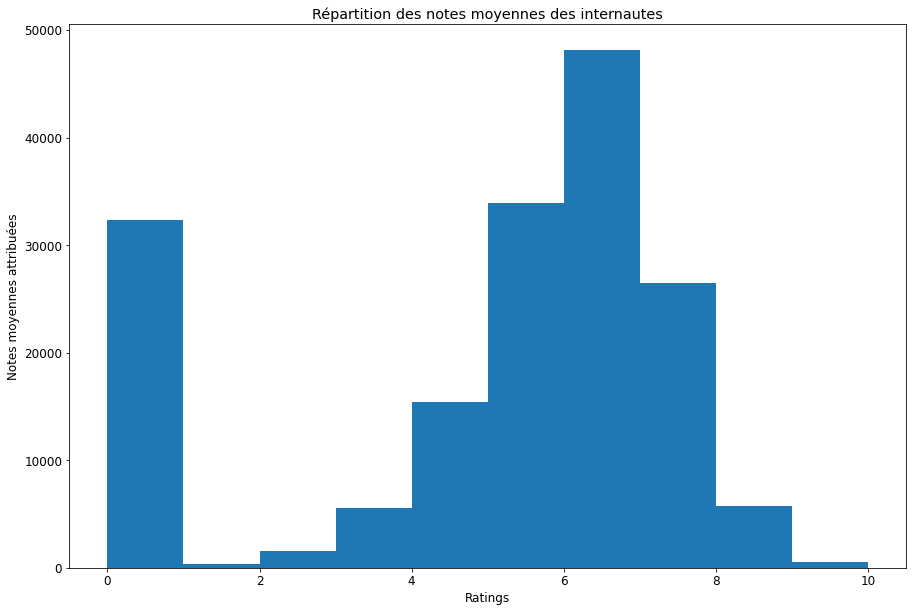

In [ ]:
# Histplot affichant la répartition des notes moyennes des internautes :

fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.hist(data_graph['averageRating'], histtype = 'bar')
ax.set_title('Répartition des notes moyennes des internautes')
ax.set_xlabel('Ratings')
ax.set_ylabel('Notes moyennes attribuées')

plt.show()

On observe que les internautes sont plutôt généreux en matière de notation : beaucoup de notes entre 7 et 8/10.

In [ ]:
data_graph.head()

,tconst,originalTitle,genres,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,numVotes,title_fr,fr,us,gb,nb_region
0,tt0015724,Dama de noche,"Drama,Mystery,Romance","[Drama, Mystery, Romance]",102.0,1993.0,2.0,2.0,1.0,0.0,6.2,25.0,~,0.0,0.0,0.0,4.0
1,tt0016906,Frivolinas,"Comedy,Musical","[Comedy, Musical]",80.0,2014.0,3.0,2.0,1.0,0.0,5.6,20.0,~,0.0,0.0,0.0,2.0
2,tt0022064,Lebbra bianca,Drama,[Drama],100.0,1951.0,3.0,1.0,1.0,0.0,5.2,54.0,La cité des stupéfiants,1.0,0.0,0.0,8.0
3,tt0025557,El negro que tenía el alma blanca,"Drama,Musical","[Drama, Musical]",87.0,1951.0,3.0,1.0,0.0,0.0,6.8,40.0,~,0.0,0.0,0.0,5.0
4,tt0030998,You're Only Young Twice,Comedy,[Comedy],81.0,1952.0,4.0,0.0,1.0,0.0,6.0,84.0,~,0.0,0.0,1.0,2.0


In [ ]:
# Filtre valeurs numériques et non nan pour graphiques
plot = data_title_basics[data_title_basics["runtimeMinutes"].notna() & (data_title_basics["runtimeMinutes"].str.isnumeric() >= 0)]
plot.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_split
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short","[Documentary, Short]"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short","[Animation, Short]"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance","[Animation, Comedy, Romance]"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short","[Animation, Short]"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short","[Comedy, Short]"


In [ ]:
# fonction pour extraire les valeurs numériques
def numbers(element):
    
    return "".join(filter(str.isnumeric, element))

In [ ]:
# récupération des valeurs numériques dans nouvelle colonne runtimeMinutes_num
plot.loc[:,'runtimeMinutes_num'] = [numbers(x) for x in plot["runtimeMinutes"]]
plot.loc[:,'runtimeMinutes_num'] = pd.to_numeric(plot['runtimeMinutes_num'])

C:\Users\maell\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\maell\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


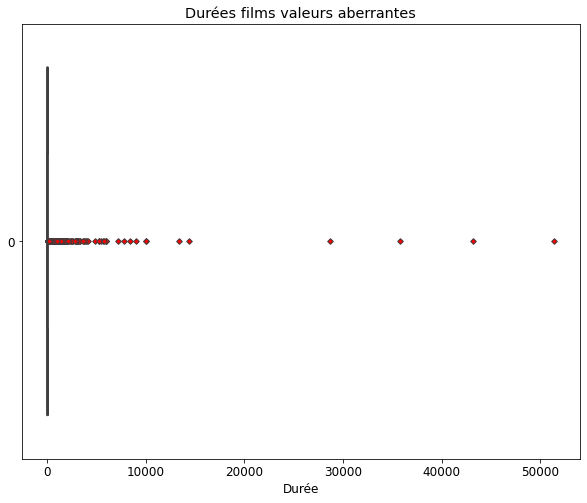

In [ ]:
# ------------------ Box Plot ------------------#

plt.subplots(figsize=(10,8))

# set up des outliers forme losange et couleur rouge
red_outlier = dict(markerfacecolor="r", marker="D", markersize=4)

# Graphique box plot
sns.boxplot(data=plot["runtimeMinutes_num"], 
            orient="h", 
            notch=True, 
            flierprops=red_outlier)

# titre
plt.title("Durées films valeurs aberrantes")

# Légende y
plt.xlabel("Durée")

# Afficher graph
plt.show()

In [ ]:
# Préparation des données pour graphique Nombre de films vs durée moyenne par catégories
# Total des titleTypes pour le barplot

total_film_par_type = plot.value_counts(["titleType"]).to_frame("total").reset_index()
total_film_par_type.head(2)


,titleType,total
0,tvEpisode,1008409
1,short,550920


In [ ]:
# Moyenne durée pour le lineplot
moy_duree = plot.groupby(["titleType"])["runtimeMinutes_num"].mean().reset_index().rename(columns={"runtimeMinutes_num":'mean_duree'})
moy_duree.head(2)

,titleType,mean_duree
0,movie,89.881239
1,short,13.122923


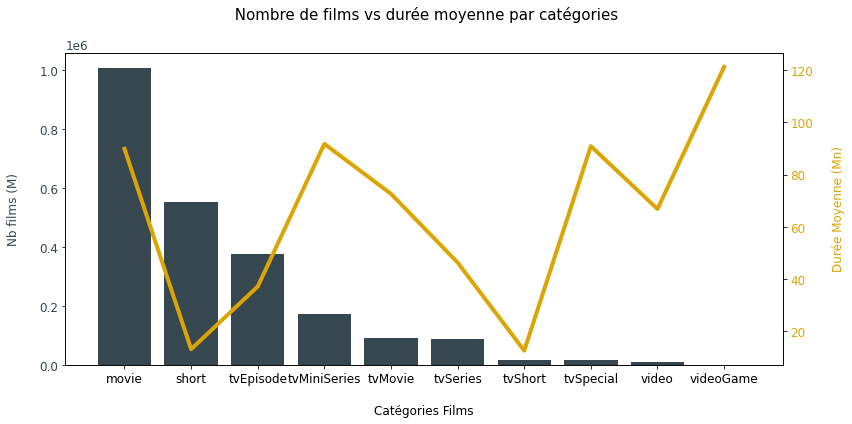

In [ ]:
x = moy_duree["titleType"]
 
fig, ax1 = plt.subplots(figsize=(12,6))
fig.suptitle(' Nombre de films vs durée moyenne par catégories ', fontsize=15)
 
# ------------------ Bar Plot ------------------#

ax1.set_xlabel('\nCatégories Films')
ax1.set_ylabel('Nb films (M)\n', color = '#37474f')
plot_1 = ax1.bar(x, total_film_par_type["total"], color = '#37474f')
ax1.tick_params(axis ='y', labelcolor = '#37474f')
 
# Adding Twin Axes
ax2 = ax1.twinx()

# ------------------ Line Plot ------------------#

ax2.set_ylabel('\nDurée Moyenne (Mn)', color = '#dba506')
plot_1 = ax2.plot(x, moy_duree["mean_duree"], color = '#dba506', linewidth=4)
ax2.tick_params(axis ='y', labelcolor = '#dba506')
 
fig.tight_layout()
 
# Show plot
plt.show()

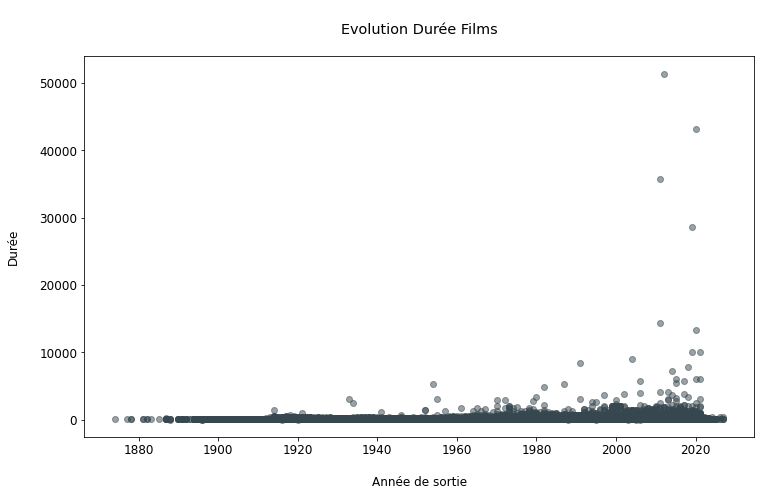

In [ ]:
# ------------------ Scatter Plot ------------------#
 
# Graphique nuage de points
plt.scatter(x = plot["startYear"], y = plot["runtimeMinutes_num"], c= '#37474F', alpha=0.5)
# Titre graphique
plt.title("\nEvolution Durée Films\n")
# Titre ordonnée
plt.ylabel("Durée\n")
# Titre ordonnée
plt.xlabel("\nAnnée de sortie")
# Afficher graph
plt.show()